In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('student_Marks.csv')
data1.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [12]:
data1.Marks.max()

55.299

In [3]:
data=data1.copy(deep=True)

In [5]:
data.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

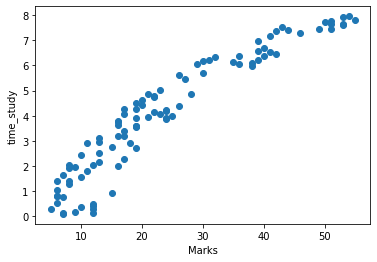

In [52]:
#scatter plot of marks vs time_study
x=data.Marks
y=data.time_study
plt.scatter(x,y)
plt.xlabel('Marks')
plt.ylabel('time_study')
plt.show()


In [34]:
data.dtypes

number_courses      int64
time_study        float64
Marks               int32
Grade              object
dtype: object

In [35]:
x=data1.iloc[:,:1]
y=data1.iloc[:,1:]

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [38]:
y_pred = regressor.predict(x_test)
y_pred

array([[ 4.43597086, 29.72559367],
       [ 4.43597086, 29.72559367],
       [ 3.79526659, 20.83387902],
       [ 4.43597086, 29.72559367],
       [ 3.5816985 , 17.86997413],
       [ 4.64953895, 32.68949856],
       [ 4.00883468, 23.7977839 ],
       [ 3.5816985 , 17.86997413],
       [ 4.64953895, 32.68949856],
       [ 4.22240277, 26.76168879],
       [ 4.43597086, 29.72559367],
       [ 3.79526659, 20.83387902],
       [ 4.43597086, 29.72559367],
       [ 3.5816985 , 17.86997413],
       [ 4.00883468, 23.7977839 ],
       [ 4.64953895, 32.68949856],
       [ 4.00883468, 23.7977839 ],
       [ 3.79526659, 20.83387902],
       [ 4.22240277, 26.76168879],
       [ 3.79526659, 20.83387902]])

In [39]:
# Evaluating the Model
from sklearn.metrics import mean_squared_error
me=mean_squared_error(y_test,y_pred)
me

58.75505904310086

In [43]:
#random forest
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor2.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

In [44]:
re=regressor2.predict(x_test)
re

array([[ 4.32806063, 30.4364834 ],
       [ 4.32806063, 30.4364834 ],
       [ 3.46281329, 18.96047716],
       [ 4.32806063, 30.4364834 ],
       [ 3.85498084, 19.37665078],
       [ 4.70845763, 32.20655284],
       [ 2.66550638, 16.03562868],
       [ 3.85498084, 19.37665078],
       [ 4.70845763, 32.20655284],
       [ 4.87408237, 30.43196824],
       [ 4.32806063, 30.4364834 ],
       [ 3.46281329, 18.96047716],
       [ 4.32806063, 30.4364834 ],
       [ 3.85498084, 19.37665078],
       [ 2.66550638, 16.03562868],
       [ 4.70845763, 32.20655284],
       [ 2.66550638, 16.03562868],
       [ 3.46281329, 18.96047716],
       [ 4.87408237, 30.43196824],
       [ 3.46281329, 18.96047716]])

In [45]:
me2=mean_squared_error(y_test,re)
me2

60.943897422570544

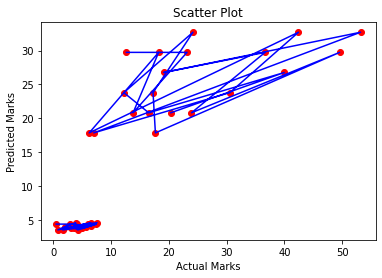

In [51]:
#scatter plot for marks and time 
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_pred,color='blue')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Scatter Plot')
plt.show()





In [53]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae


5.383038113098674